In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import sys
FOLDERNAME='ML_final_project'
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [22]:
print("loading datasets...")
train = pd.read_csv('/content/drive/MyDrive/ML_final_project/data/train.csv')
stores = pd.read_csv('/content/drive/MyDrive/ML_final_project/data/stores.csv')
features = pd.read_csv('/content/drive/MyDrive/ML_final_project/data/features.csv')
test = pd.read_csv('/content/drive/MyDrive/ML_final_project/data/test.csv')

print("loaded successfully")

loading datasets...
loaded successfully


In [23]:
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])
test['Date'] = pd.to_datetime(test['Date'])

train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.isocalendar().week

In [24]:
datasets = {'Train': train, 'Stores': stores, 'Features': features, 'Test': test}
for name, df in datasets.items():
   print(f"{name} dataset:")
   print(f"shape: {df.shape}")
   print(f"columns: {list(df.columns)}")

Train dataset:
shape: (421570, 8)
columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Year', 'Month', 'Week']
Stores dataset:
shape: (45, 3)
columns: ['Store', 'Type', 'Size']
Features dataset:
shape: (8190, 12)
columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']
Test dataset:
shape: (115064, 4)
columns: ['Store', 'Dept', 'Date', 'IsHoliday']


In [25]:
print(f"total weekly sales records: {len(train):,}")
print(f"date range: {train['Date'].min()} to {train['Date'].max()}")
print(f"number of stores: {train['Store'].nunique()}")
print(f"number of departments: {train['Dept'].nunique()}")
print(f"total store-department combinations: {train[['Store', 'Dept']].drop_duplicates().shape[0]}")

total weekly sales records: 421,570
date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
number of stores: 45
number of departments: 81
total store-department combinations: 3331


In [26]:
holiday_stats = train.groupby('IsHoliday')['Weekly_Sales'].agg(['count', 'mean', 'std'])
print("holiday vs non-holiday Sales:")
print(holiday_stats)

holiday_weeks = train[train['IsHoliday'] == True]['Date'].unique()
print(f"holiday weeks in dataset: {len(holiday_weeks)}")
print("holiday dates:")
for date in sorted(holiday_weeks):
   print(f"  {date.strftime('%Y-%m-%d')}")

holiday vs non-holiday Sales:
            count          mean           std
IsHoliday                                    
False      391909  15901.445069  22330.747450
True        29661  17035.823187  27222.000409
holiday weeks in dataset: 10
holiday dates:
  2010-02-12
  2010-09-10
  2010-11-26
  2010-12-31
  2011-02-11
  2011-09-09
  2011-11-25
  2011-12-30
  2012-02-10
  2012-09-07


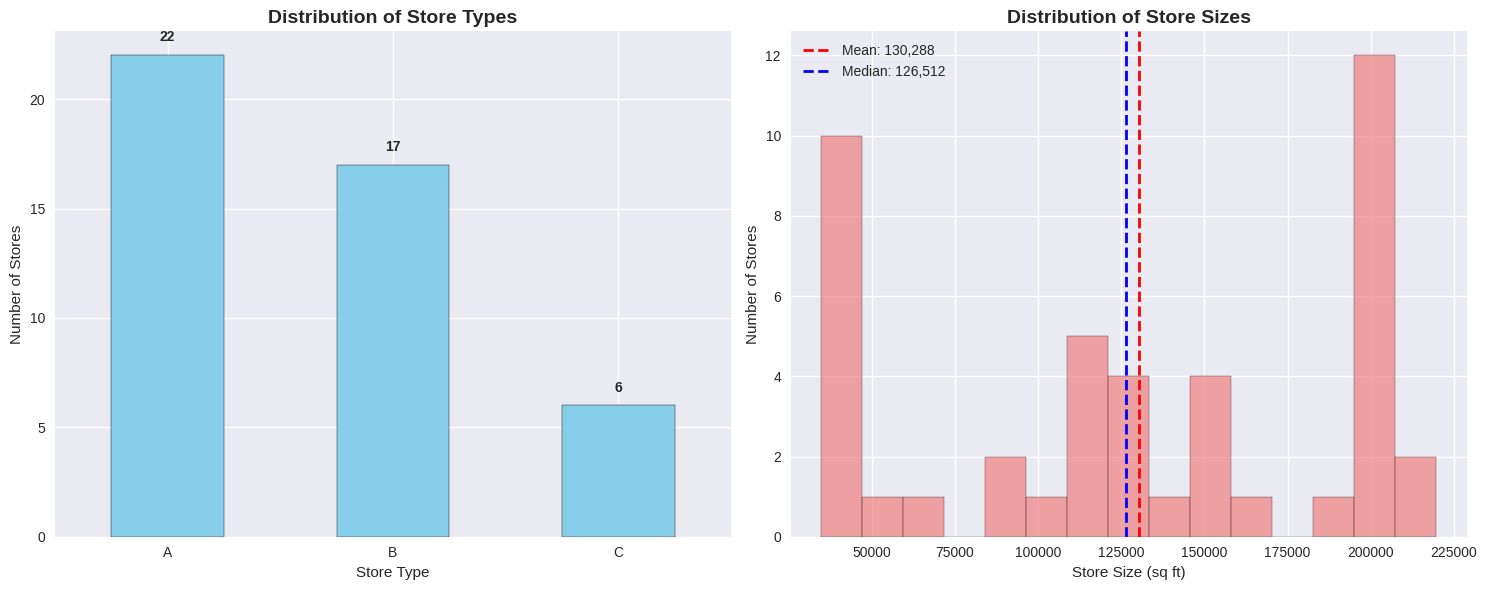

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

stores['Type'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Store Types', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Store Type')
axes[0].set_ylabel('Number of Stores')
axes[0].tick_params(axis='x', rotation=0)

for i, v in enumerate(stores['Type'].value_counts().values):
   axes[0].text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

axes[1].hist(stores['Size'], bins=15, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Store Sizes', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Store Size (sq ft)')
axes[1].set_ylabel('Number of Stores')
axes[1].axvline(stores['Size'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {stores["Size"].mean():,.0f}')
axes[1].axvline(stores['Size'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {stores["Size"].median():,.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

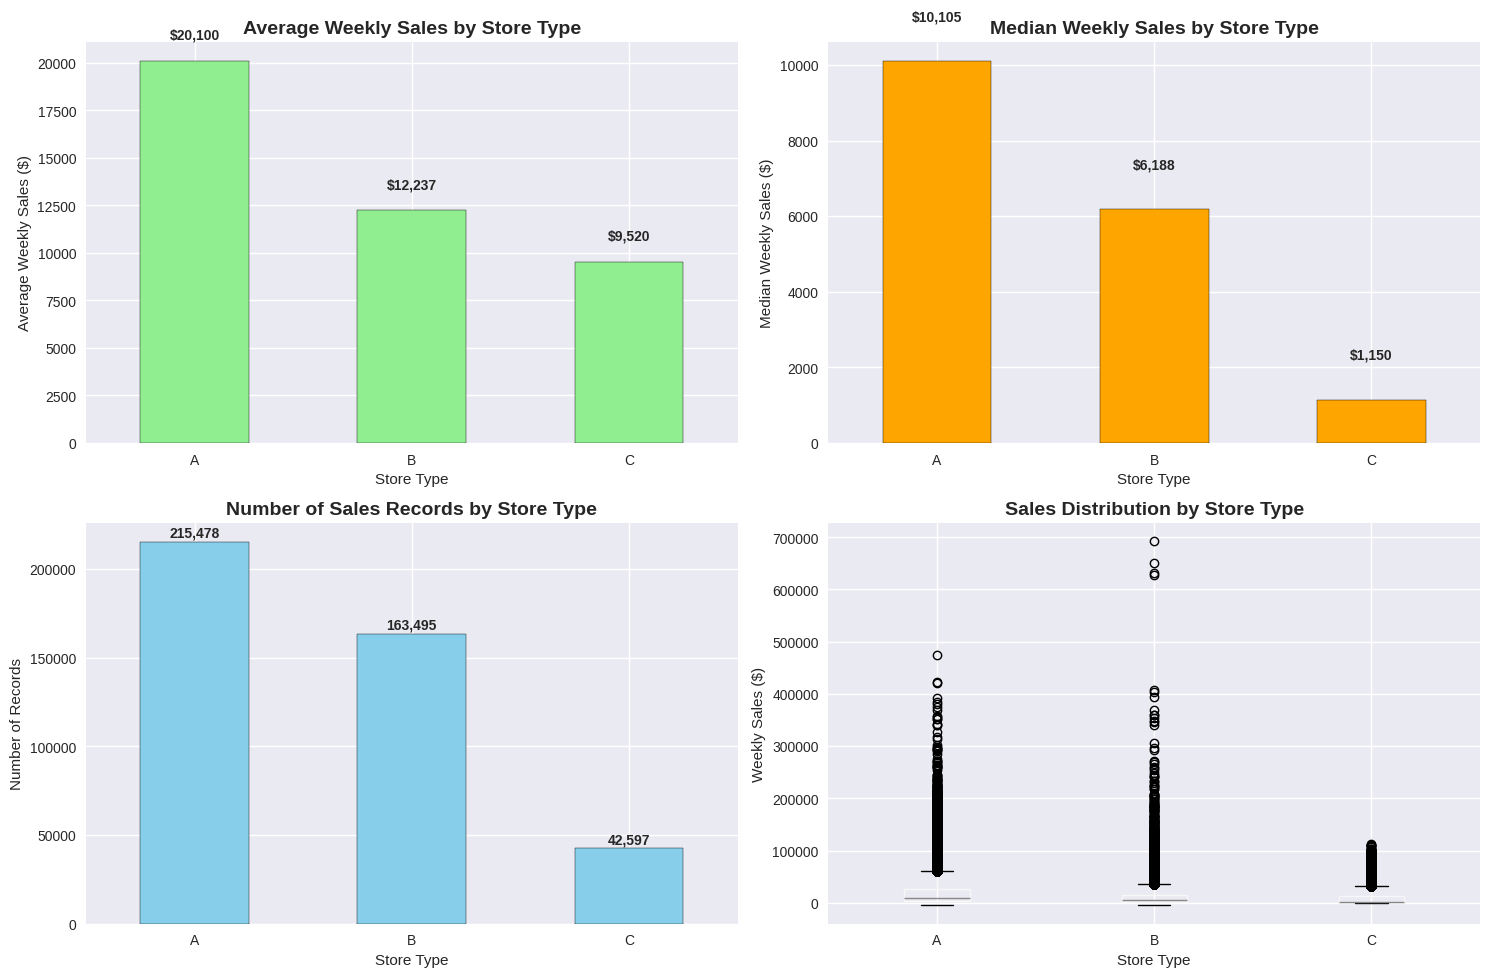

In [28]:
store_sales = train.merge(stores, on='Store')
store_type_sales = store_sales.groupby('Type')['Weekly_Sales'].agg(['count', 'mean', 'median'])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

store_type_sales['mean'].plot(kind='bar', ax=axes[0,0], color='lightgreen', edgecolor='black')
axes[0,0].set_title('Average Weekly Sales by Store Type', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Store Type')
axes[0,0].set_ylabel('Average Weekly Sales ($)')
axes[0,0].tick_params(axis='x', rotation=0)

for i, v in enumerate(store_type_sales['mean'].values):
    axes[0,0].text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

store_type_sales['median'].plot(kind='bar', ax=axes[0,1], color='orange', edgecolor='black')
axes[0,1].set_title('Median Weekly Sales by Store Type', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Store Type')
axes[0,1].set_ylabel('Median Weekly Sales ($)')
axes[0,1].tick_params(axis='x', rotation=0)

for i, v in enumerate(store_type_sales['median'].values):
    axes[0,1].text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

store_type_sales['count'].plot(kind='bar', ax=axes[1,0], color='skyblue', edgecolor='black')
axes[1,0].set_title('Number of Sales Records by Store Type', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Store Type')
axes[1,0].set_ylabel('Number of Records')
axes[1,0].tick_params(axis='x', rotation=0)

for i, v in enumerate(store_type_sales['count'].values):
    axes[1,0].text(i, v + 1000, f'{v:,}', ha='center', va='bottom', fontweight='bold')

store_sales.boxplot(column='Weekly_Sales', by='Type', ax=axes[1,1])
axes[1,1].set_title('Sales Distribution by Store Type', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Store Type')
axes[1,1].set_ylabel('Weekly Sales ($)')
plt.suptitle('')

plt.tight_layout()
plt.show()

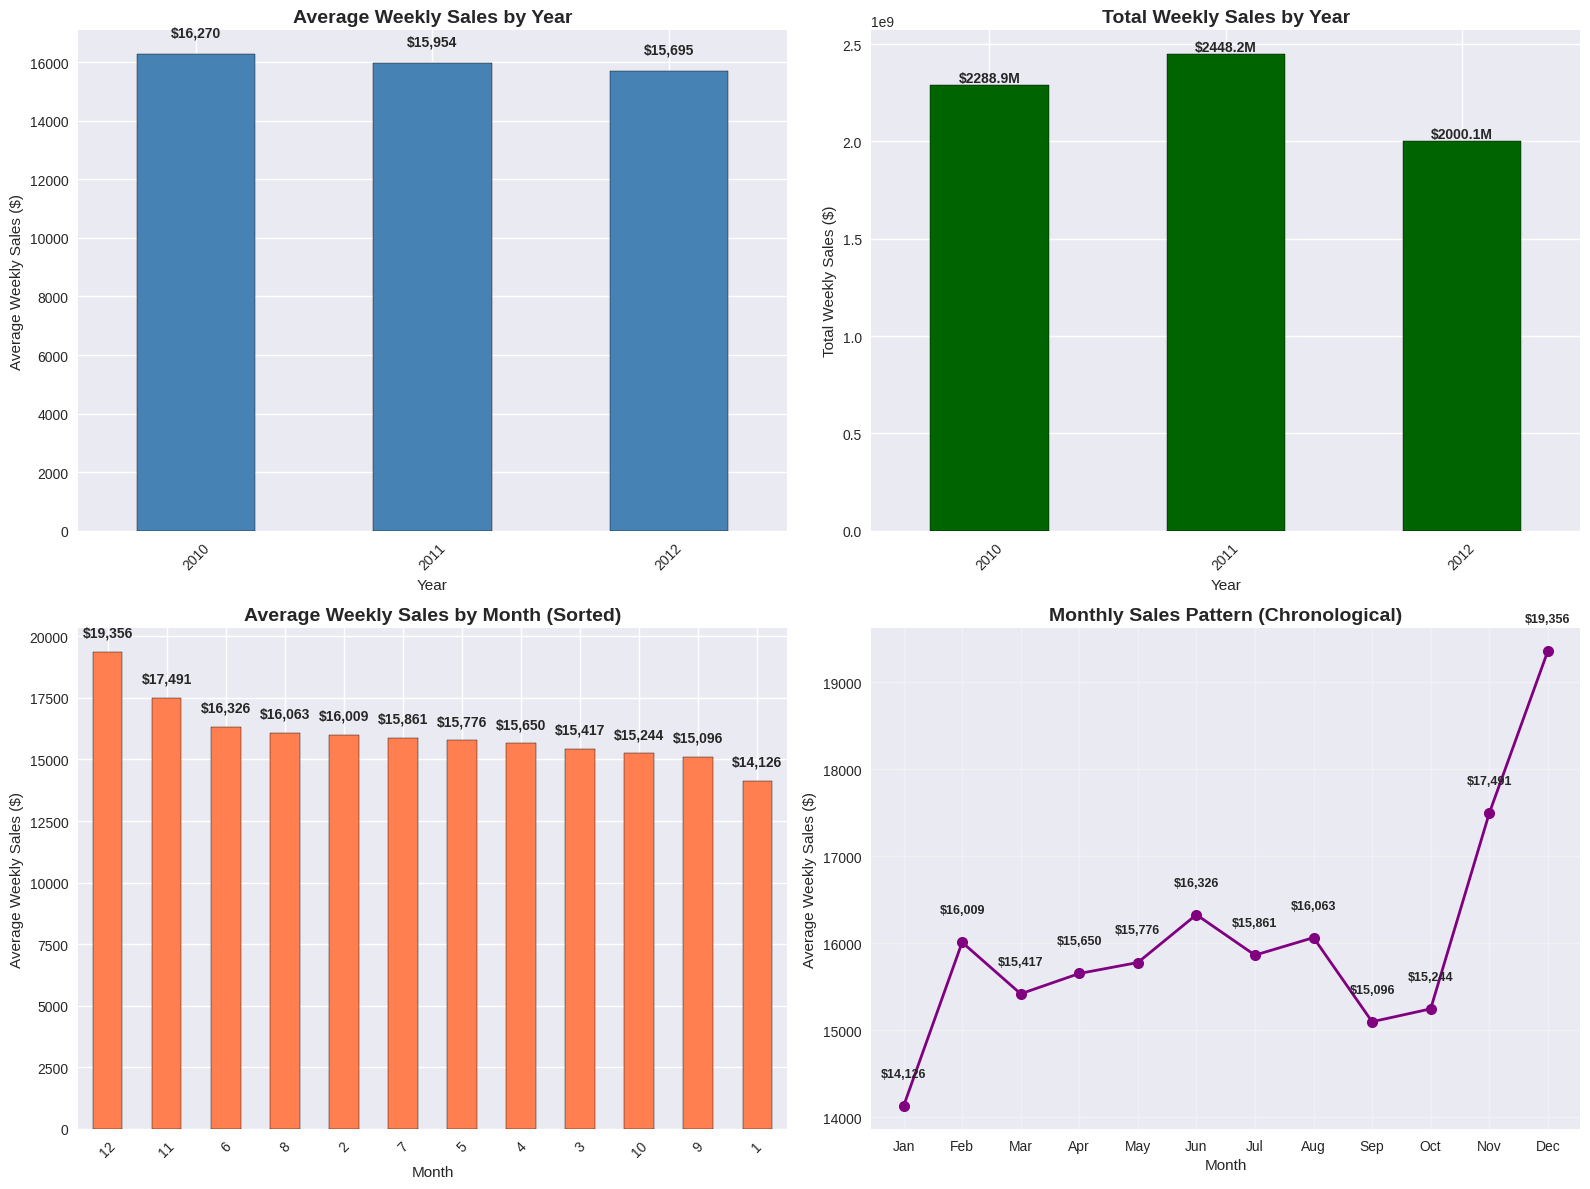

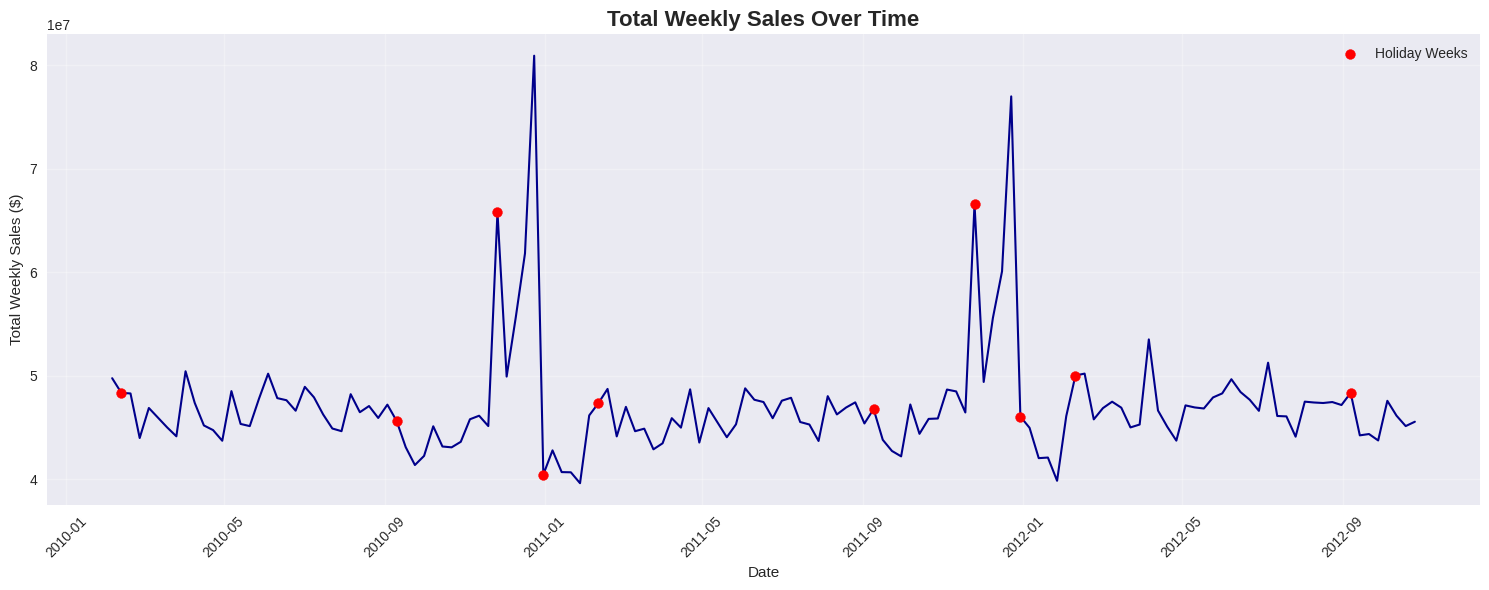

In [29]:
yearly_sales = train.groupby('Year')['Weekly_Sales'].agg(['count', 'mean', 'sum'])
monthly_sales = train.groupby('Month')['Weekly_Sales'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

yearly_sales['mean'].plot(kind='bar', ax=axes[0,0], color='steelblue', edgecolor='black')
axes[0,0].set_title('Average Weekly Sales by Year', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Average Weekly Sales ($)')
axes[0,0].tick_params(axis='x', rotation=45)

for i, v in enumerate(yearly_sales['mean'].values):
    axes[0,0].text(i, v + 500, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

yearly_sales['sum'].plot(kind='bar', ax=axes[0,1], color='darkgreen', edgecolor='black')
axes[0,1].set_title('Total Weekly Sales by Year', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Total Weekly Sales ($)')
axes[0,1].tick_params(axis='x', rotation=45)

for i, v in enumerate(yearly_sales['sum'].values):
    axes[0,1].text(i, v + 2000000, f'${v/1e6:.1f}M', ha='center', va='bottom', fontweight='bold')

monthly_sales.plot(kind='bar', ax=axes[1,0], color='coral', edgecolor='black')
axes[1,0].set_title('Average Weekly Sales by Month (Sorted)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Average Weekly Sales ($)')
axes[1,0].tick_params(axis='x', rotation=45)

for i, v in enumerate(monthly_sales.values):
    axes[1,0].text(i, v + 500, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

monthly_sales_chrono = train.groupby('Month')['Weekly_Sales'].mean()
monthly_sales_chrono.plot(kind='line', ax=axes[1,1], color='purple', marker='o', linewidth=2, markersize=8)
axes[1,1].set_title('Monthly Sales Pattern (Chronological)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Average Weekly Sales ($)')
axes[1,1].set_xticks(range(1, 13))
axes[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1,1].grid(True, alpha=0.3)

for i, v in enumerate(monthly_sales_chrono.values):
    axes[1,1].text(i+1, v + 300, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
weekly_sales_trend = train.groupby('Date')['Weekly_Sales'].sum()
plt.plot(weekly_sales_trend.index, weekly_sales_trend.values, color='darkblue', linewidth=1.5)
plt.title('Total Weekly Sales Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales ($)')
plt.grid(True, alpha=0.3)

holiday_dates = train[train['IsHoliday'] == True]['Date'].unique()
holiday_sales = train[train['IsHoliday'] == True].groupby('Date')['Weekly_Sales'].sum()
plt.scatter(holiday_sales.index, holiday_sales.values, color='red', s=50, zorder=5, label='Holiday Weeks')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

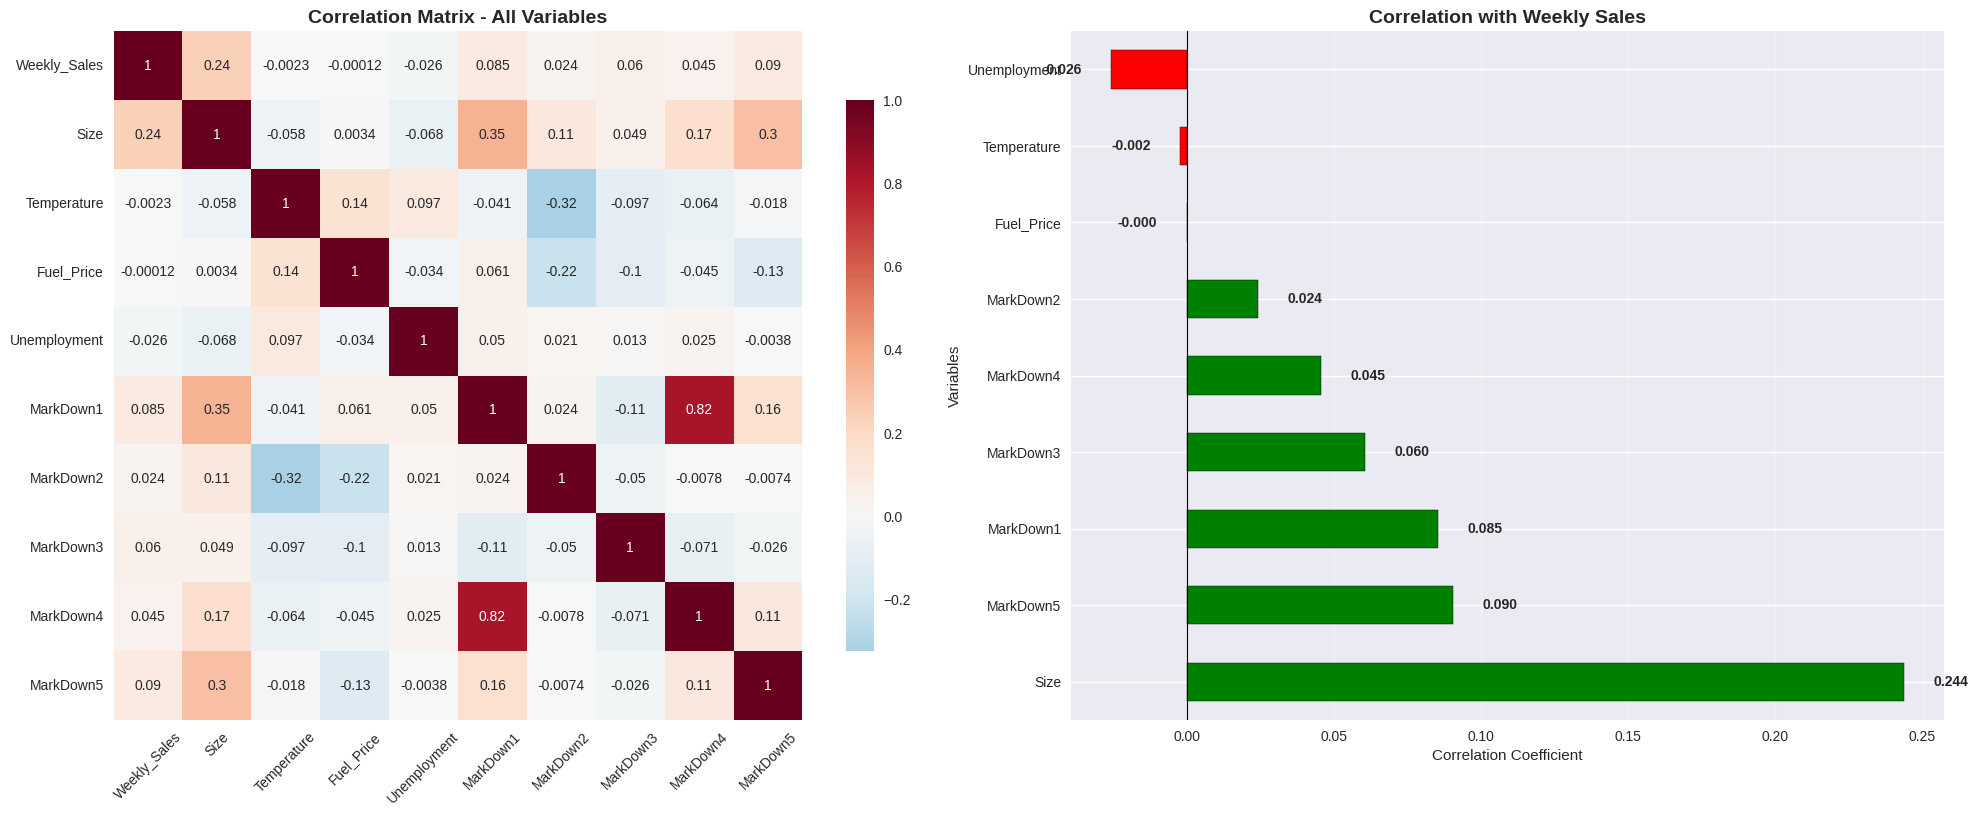

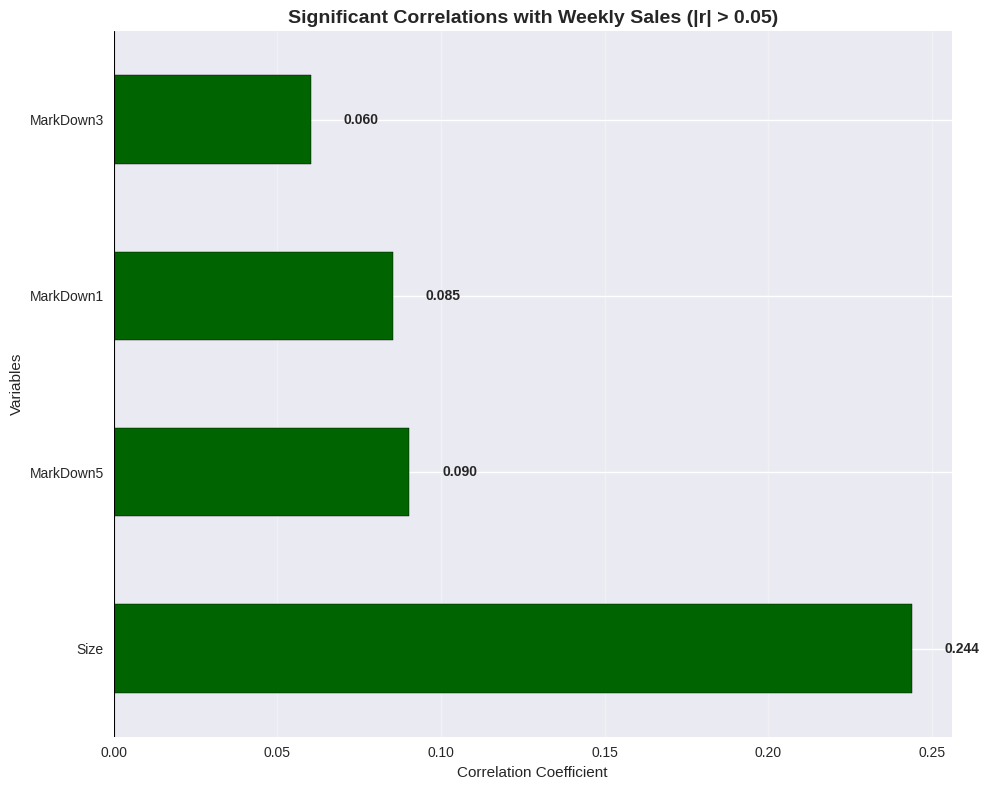

In [30]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
full_data = train.merge(stores, on='Store').merge(features, on=['Store', 'Date'])

numeric_cols = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'Unemployment']
for col in markdown_cols:
    if col in full_data.columns:
        numeric_cols.append(col)

correlation_matrix = full_data[numeric_cols].corr()
sales_corr = correlation_matrix['Weekly_Sales'].sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, ax=axes[0], cbar_kws={'shrink': 0.8})
axes[0].set_title('Correlation Matrix - All Variables', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

sales_corr_filtered = sales_corr.drop('Weekly_Sales')
colors = ['green' if x > 0 else 'red' for x in sales_corr_filtered.values]

sales_corr_filtered.plot(kind='barh', ax=axes[1], color=colors, edgecolor='black')
axes[1].set_title('Correlation with Weekly Sales', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_ylabel('Variables')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(axis='x', alpha=0.3)

for i, v in enumerate(sales_corr_filtered.values):
    axes[1].text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}',
                va='center', ha='left' if v > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
significant_corr = sales_corr_filtered[abs(sales_corr_filtered) > 0.05]
colors = ['darkgreen' if x > 0 else 'darkred' for x in significant_corr.values]

significant_corr.plot(kind='barh', color=colors, edgecolor='black')
plt.title('Significant Correlations with Weekly Sales (|r| > 0.05)', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(significant_corr.values):
    plt.text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}',
             va='center', ha='left' if v > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()

In [31]:
print("negative sales (returns):")
negative_sales = train[train['Weekly_Sales'] < 0]
print(f"  count: {len(negative_sales)} ({len(negative_sales)/len(train)*100:.2f}%)")
print(f"  cotal negative amount: ${negative_sales['Weekly_Sales'].sum():,.2f}")

print("zero sales:")
zero_sales = train[train['Weekly_Sales'] == 0]
print(f"  count: {len(zero_sales)} ({len(zero_sales)/len(train)*100:.2f}%)")

print("missing weeks analysis:")
date_range = pd.date_range(start=train['Date'].min(), end=train['Date'].max(), freq='W')
missing_weeks = set(date_range) - set(train['Date'].unique())
print(f"  missing weeks: {len(missing_weeks)}")

print("store-department coverage:")
total_possible = train['Store'].nunique() * train['Dept'].nunique()
actual_combinations = len(train[['Store', 'Dept']].drop_duplicates())
print(f"possible combinations: {total_possible}")
print(f"actual combinations: {actual_combinations}")
print(f"coverage: {actual_combinations/total_possible*100:.1f}%")

negative sales (returns):
  count: 1285 (0.30%)
  cotal negative amount: $-88,161.56
zero sales:
  count: 73 (0.02%)
missing weeks analysis:
  missing weeks: 142
store-department coverage:
possible combinations: 3645
actual combinations: 3331
coverage: 91.4%


# საბოლოო დასკვნები


### 1. **დღესასწაულები მნიშვნელოვანია**
- დღესასწაულების კვირებში გაყიდვები იზრდება 7.1%-ით.

### 2. **გაყიდვები დამოკიდებულია სეზონებზე**
- Peak: December (19,356 USD) and November (17,491 USD)
- მნიშვნელოვანი feature-ები: month, quarter, week-of-year

### 3. **დიდი მაღაზიები და მათი გაყიდვები**
- A ტიპის: 20,100 USD vs C ტიპის: 9,520 USD

### 4. **გარე ფაქტორები არც ისე მნიშვნელოვანია**
- Markdowns: დაბალი კორელაციები (0.08-0.09)
- ტემპერატურა/საწვავი: თითქმის არანაირი კორელცია

## მოდელირების სტრატეგიები

### **Feature-ების მნიშვნელობა:**
1. **feature-ები დღესასწაულებთან დაკავშირებით დაკავშირებით** (ყველაზე მნიშვნელოვანი)
2. **დროითი feature-ები** (სეზონური განსხვავებების გასათვალისწინებლად)
3. **მაღაზიის მახასიათებლები** (ტიპი, ზომა)
4. **Lag feature-ები** (1, 2, 4, 12, 52 კვირებით)
    - წინა კვირების გაყიდვების გავლენა მომდევნო კვირის გაყიდებზე
5. **მოძრავი სტატისტიკა** (4, 8, 12 კვირიანი ფანჯრები)
    - წინა 4, 8, 12 კვირის გაყიდვების საშუალო

### **ვალიდაციისას:**
- Time-based უნდა გაიყოს მონაცემები
- საყურადღებოა დღესასწაულების კვირები


### **შეგვიძლია ვივარაუდოთ, რომ ყველაზე კარგად იმუშავებს Temporal Fusion Transformer**
